In [17]:
#Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
data = pd.read_csv('data.csv')

In [6]:
#Check your data

data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,0.00,0.00,171.62,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,117.08,1.11,119.66,Sep-2013,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,0.00,0.00,649.91,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,0.00,0.00,357.48,Jan-2015,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,...,0.00,0.00,67.79,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [8]:
data.dtypes

member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list

In [9]:
#Check how many factor levels there are for purpose

data['purpose'].nunique()

12

In [11]:
#Use .groupby in order to organize our dataset
data_purpose = data.groupby('purpose')

In [12]:
#Take a look at the count for each purpose category
data_purpose.size()


purpose
car                     7
credit_card            45
debt_consolidation    109
home_improvement        5
house                   1
major_purchase          6
medical                 3
moving                  1
other                  11
small_business         10
vacation                1
wedding                 1
dtype: int64

In [20]:
#Extract only t
data_purpose['int_rate'].mean().reset_index()

,purpose,int_rate
0,car,13.638571
1,credit_card,12.142889
2,debt_consolidation,12.864312
3,home_improvement,15.346000
4,house,17.270000
5,major_purchase,10.941667
6,medical,10.636667
7,moving,9.910000
8,other,13.268182
9,small_business,13.323000


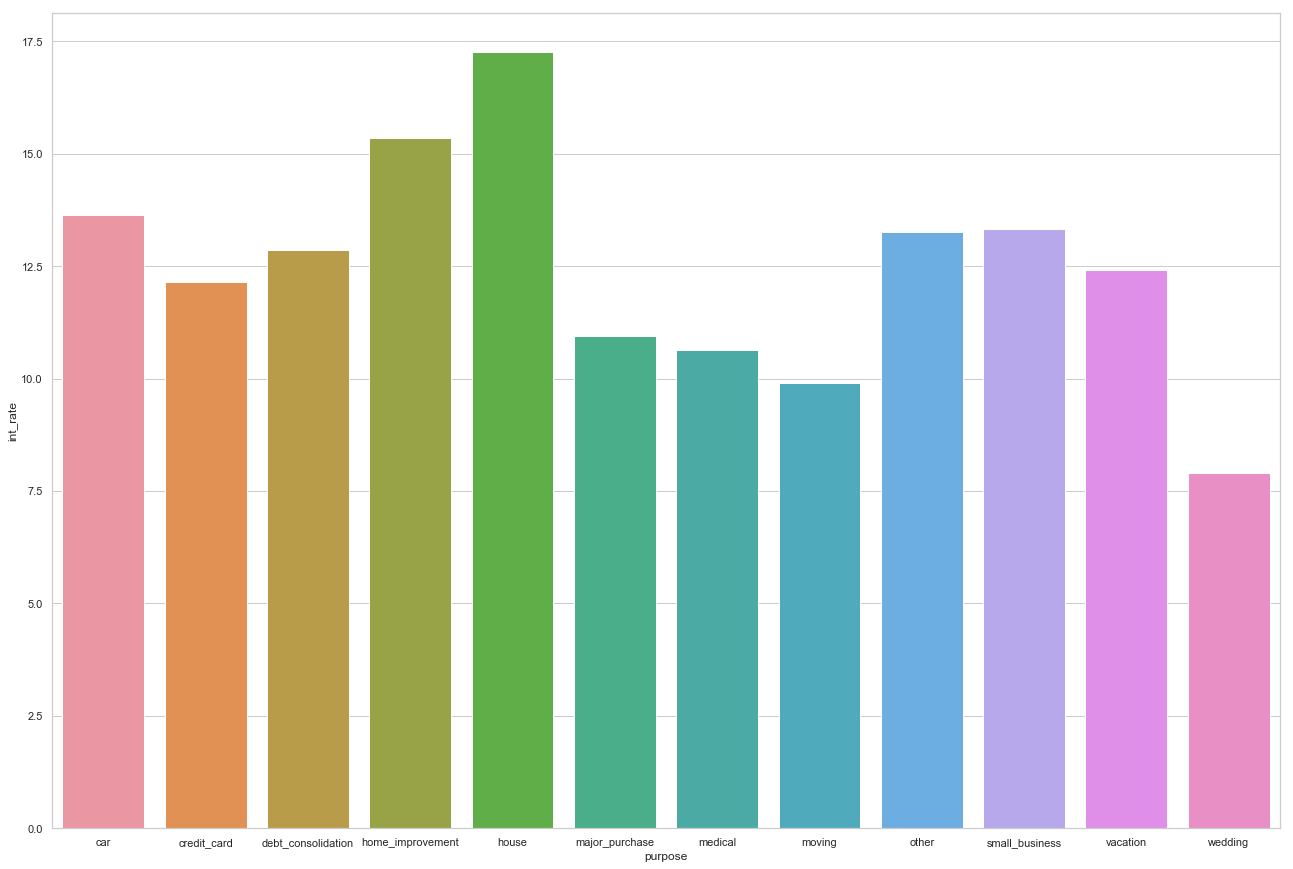

In [26]:
sns.set(style="whitegrid", rc={'figure.figsize':(22,15)})
data_org = data_purpose['int_rate'].mean().reset_index()
ax = sns.barplot(x="purpose", y="int_rate", data=data_org)